# TITANIC SURVIVAL PREDICTION

## Step 1:- Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import polars as pl

from summarytools import dfSummary
from skimpy import skim

## Step 2 :- Loading the Dataset

In [ ]:
data=pd.read_csv("Titanic-Dataset.csv")

## Step 3:- Domain Analysis

1. PassengerId:- Unique number assign to all passengers.
2. Survived :- Yes(1)/N0(0)
3. Pclass:- First class(1),Second class(2),Third class(3)
4. Name:- Name of passenger
5. Sex:- Male/Female
6. Age:- Age of the person
7. SibSp:- Siblings/Spouses Aboard
8. Parch:- Parents/Children Aboard
9. Ticket:- Unique Number of ticket
10. Fare:- Fare price
11. Cabin:- Seat allocated
12. Embarked:-  The port where passengers boarded the Titanic. There are three possible values for this attribute: (C,Q,S)

## Step 4:- Basic Checks and Data Preprocessing

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Age, Cabin, Embarked has null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:

df = pl.from_pandas(data)

In [ ]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 446.0 (257.4)min < med < max:1.0 < 446.0 < 891.0IQR (CV) : 445.0 (1.7),891 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3Xv27aYBhH4ddWikxAtvhTuICO3ZBYuICOvdheBENnhi6d2JCQZYSbqBZ11yxJMVaTnuo8K/x4v+EMSdK2bUj/uvStHyBd4+6tH6D/R5Ikw4gY3Dj/2bbtw3Mf/jHUnsfTiPh147bvnnqb+u5sOp1+KopidMv4dDqVSZJ8eS7WF0NNkmQ4m80+53k+6Xr4crm8q+v6w3g8/p6mafOae+pt6rsjIpqmySLi43q9/jqfz09dtlVVZdvtdnI8HgcR0T3UiBjkeT7ZbDYPRVE8djm+3+8nu93u/Wq1+rZcLssu27576m3qu5/s77MsaxaLxY+u+4gYvvThVX+jFkXx2PV4WZbDiIjRaNR523dPvU1999P93+J//UIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVwt01X6qqKuv6w+fzOYuIqOs6OxwO96+5p96mvrvv/pq+fgOe9DS+8Np05AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Survived[int64],Mean (sd) : 0.4 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (0.8),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABgElEQVR4nO3dQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVClouuumUGNU2g+eZz3zk8VLQhaZ1GEYCvx3L399ATDG7NqCWuuylDKfOP9zGIbjxL3w7ddQa63L9Xr92nXdasrww+HwXmt9Eyv3unZHnXddt9put8e+70+3DG6tLXa73Wq/389LKULlLlcf/aWU0vf9abPZfEyYv5ywB37wMkUEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhFFfocIYzzysRKg8xLMPKxEqj/LUw0qEykM967ASL1NEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRRv2+p7W2uHVwa21xPp9npZSu1nrzhRGnu1wus6mtXFvzBf1jTn1geGNvAAAAAElFTkSuQmCC"">",0(0.0%)
3,Pclass[int64],Mean (sd) : 2.3 (0.8)min < med < max:1.0 < 3.0 < 3.0IQR (CV) : 1.0 (2.8),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkklEQVR4nO3dUWoiQRiF0apBRF+6EcHFuIhZ7CzC3chQPkzCgPasILE1XWRucs5rW1I2H1IK+tdpmgr873589gZgjtVnb4Cvo9a6LaWsn1z+d5qml7cuCpVF1Fq3+/3+5zAMu2fWXy6X37XWX2/FKlSWsh6GYXc8Hl/GcXx9ZGFrbXM6nXbn83ldShEq/Y3j+Ho4HP48sXT73kUfpoggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQi3P1r9J6TLmCud0PtPekC5rr3jtp10gXMNWsqSq9JFzCX8T0dONcvT6gLc67vQ6jLc67vQKidONcvyxf+RBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqESY9SvU1trm0SdurW2u1+uqlDLUWh/eWLDhdrutvuE9+9DrvveYf4LcdwKKR7CqAAAAAElFTkSuQmCC"">",0(0.0%)
4,Name[object],"1. Braund, Mr. Owen Harris2. Boulos, Mr. Hanna3. Frolicher-Stehli, Mr. Maxmilli4. Gilinski, Mr. Eliezer5. Murdlin, Mr. Joseph6. Rintamaki, Mr. Matti7. Stephenson, Mrs. Walter Bertra8. Elsbury, Mr. William James9. Bourke, Miss. Mary10. Chapman, Mr. John Henry11. other",1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)881 (98.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGb

In [ ]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 891    │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA   ┃ NA %    ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ PassengerId    │    0 │       0 │      446 │    257.4 │     1 │  223.5 │    446 │  668.5 │    891 │ ▇▇▇▇▇▇ │  │
│ │ Survived       │    0 │       0 │   0.3838 │   0.4866 │     0 │      0 │      0 │      1 │      1 │ ▇    ▅ │  │
│ │ Pclass         │    0 │       0 │    2.309 │   0.8361 │     1 │      2 │      3 │      3 │      3 │ ▃  ▃ ▇ │  │
│ │ Age            │  177 │   19.87 │     29.7 │    14.53 │  0.42 │  20.12 │     28 │     38 │     80 │ ▂▇▇▃▁  │  │
│ │ SibSp          │    0 │       0 │    0.523 │    1.103 │     0 │      0 │      0 │      1 │      8 │   ▇    │  │
│ │ Parch          │    0 │       0 │   0.3816 │   0.8061 │     0 │      0 │      0 │      0 │      6 │  ▇▁▁   │  │
│ │ Fare           │    0 │       0 │     32.2 │    49.69 │     0 │   7.91 │  14.45 │     31 │  512.3 │   ▇    │  │
│ └────────────────┴──────┴─────────┴──────────┴──────────┴───────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA       ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                     │        0 │          0 │                          4.1 │                     3626 │  │
│ │ Sex                      │        0 │          0 │                            1 │                      891 │  │
│ │ Ticket                   │        0 │          0 │                          1.3 │                     1130 │  │
│ │ Cabin                    │      687 │       77.1 │                         0.27 │                      238 │  │
│ │ Embarked                 │        2 │       0.22 │                            1 │                      889 │  │
│ └──────────────────────────┴──────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
data.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [ ]:
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
for i in cat_col.drop(columns=['Name',"Ticket","Cabin"]):
    print(i,data[i].unique())
    print(data[i].value_counts())
    print('-----------------------------')

Sex ['male' 'female']
Sex
male      577
female    314
Name: count, dtype: int64
-----------------------------
Embarked ['S' 'C' 'Q' nan]
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
-----------------------------


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Encoding

In [ ]:
# Lable Encoding For sex
# One Hot Encoding for Embarked

In [ ]:
# Lable Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data2= data.copy()

In [ ]:
# One Hot Encoding
df1 = pd.get_dummies(data2['Embarked'],dtype='int',prefix ='Embarked', drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Embarked',axis=1)

In [ ]:
data2.Embarked_S.unique()

array([1, 0])

In [ ]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1


In [ ]:
# Removing unique values from dataset (No relation with target)
data= data2.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)

In [ ]:
#Handle Null Values
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_Q      0
Embarked_S      0
dtype: int64

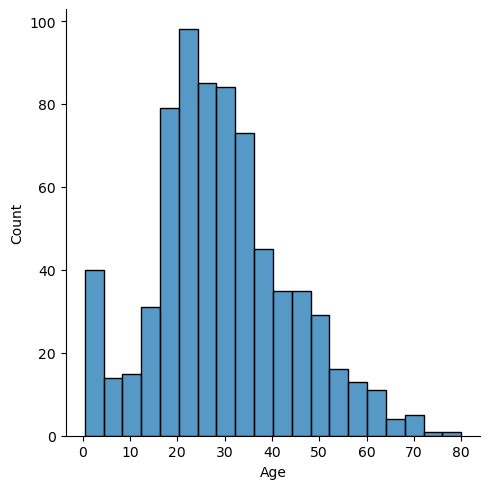

In [ ]:
sns.displot(x= data["Age"])


In [ ]:
# Distribution of the Age is skewed so we use median for null values
(data.Age.isnull().sum()/len(data))*100

19.865319865319865

In [ ]:
data.Age.median()

28.0

In [ ]:
data.loc[data["Age"].isnull()==True,"Age"]=28.0

In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
# Duplicate CHecks

In [ ]:
data.duplicated().sum()

116

In [ ]:
data.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,0
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,28.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


# Step5:- Exploratory Data Analysis

In [ ]:

import sweetviz as sv #importing the sweetviz library

report = sv.analyze(data) # here we are initializing the graph flow

report.show_html('Titanic.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Titanic.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


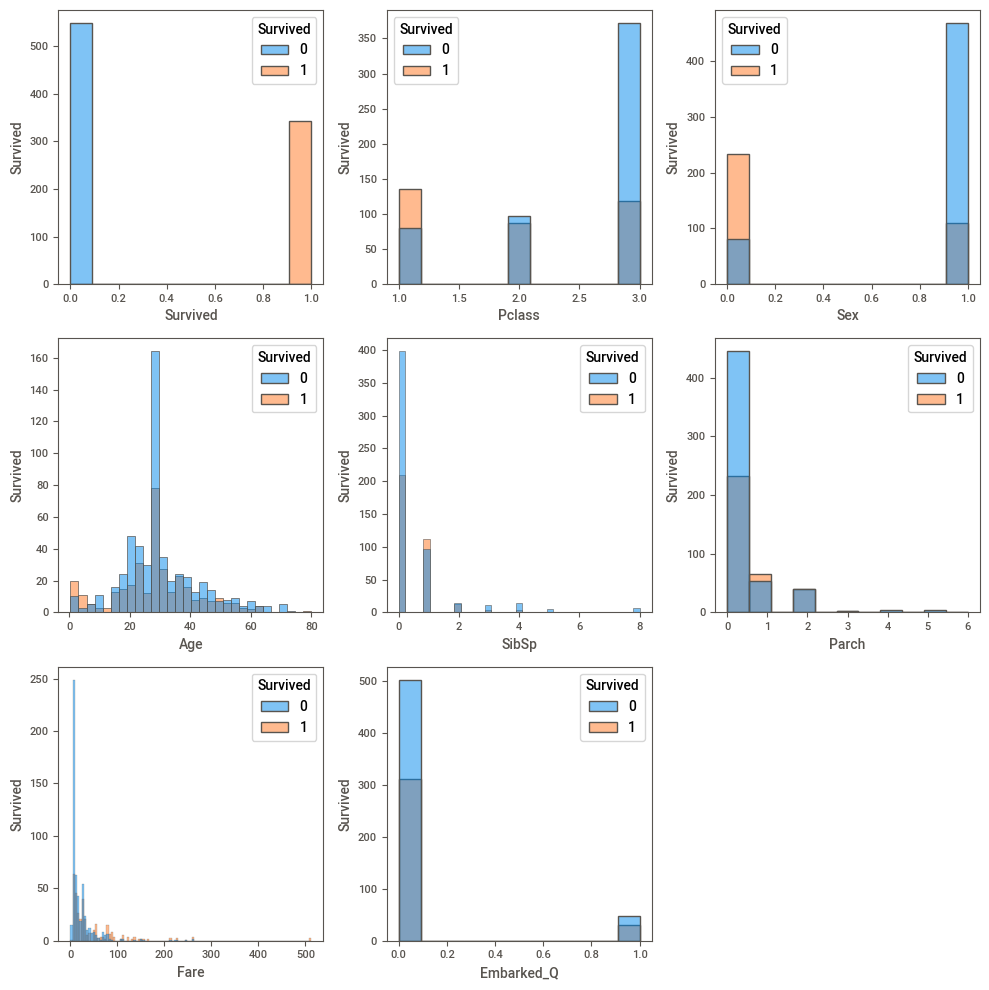

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,10))
i=1
for col in data:
    if i <9:
        ax= plt.subplot(3,3,i)
        sns.histplot(x=data[col],hue=data['Survived'])
        plt.xlabel(col)
        plt.ylabel('Survived')
    i=i+1
plt.tight_layout()

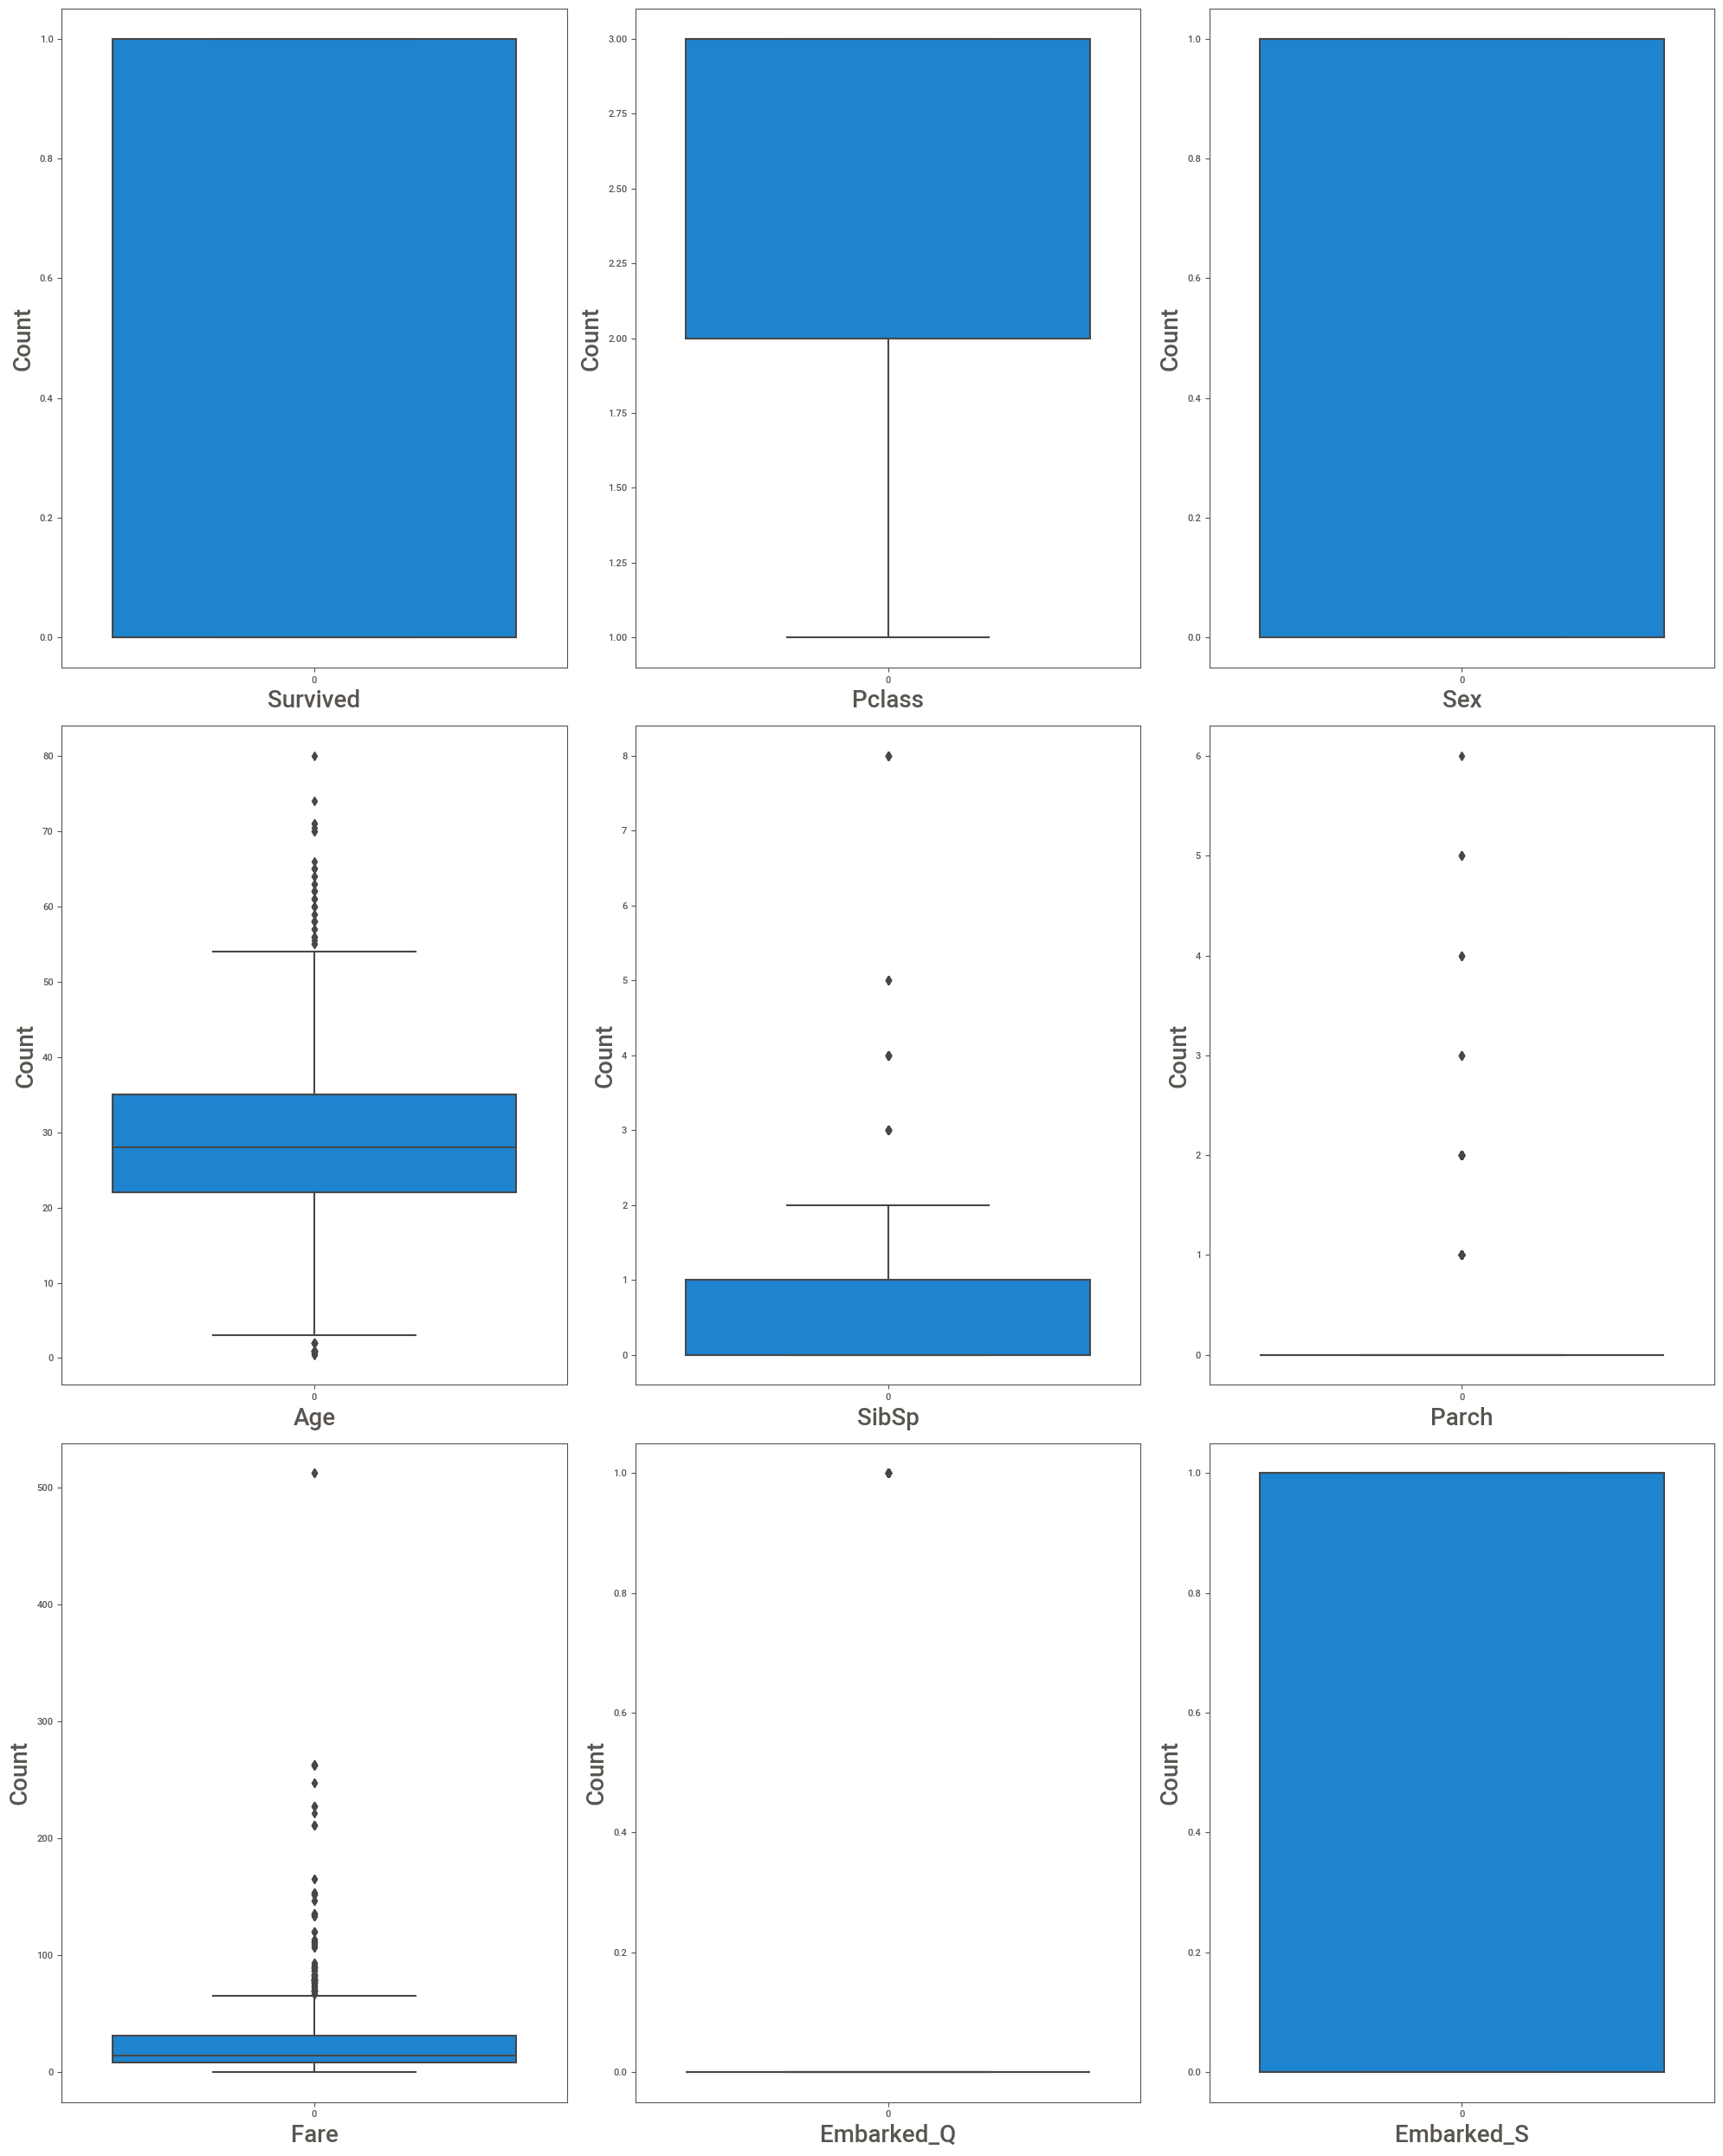

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Age, Sibsp, Parch, Fare have outliers, need to handle all outliers
data2= data[["Age","SibSp","Parch","Fare"]]

In [ ]:
q3= data.quantile(.75)
q1= data.quantile(.25)
iqr= q3-q1

lower= q1-1.5*iqr
upper= q3 + 1.5*iqr

In [ ]:
for i in data2:
  data.loc[data[i]<lower[i],i]=data[i].median()

In [ ]:
for i in data2:
  data.loc[data[i]>upper[i],i]=data[i].median()

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
d1= ["Survived"]
data1=sc.fit_transform(data.drop(d1,axis=1))
data1=pd.DataFrame(data1,columns= ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_Q', 'Embarked_S'])

In [ ]:
data1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1.0,1.0,0.372549,0.5,0.0,0.111538,0.0,1.0
1,0.0,0.0,0.686275,0.5,0.0,0.222372,0.0,0.0
2,1.0,0.0,0.450980,0.0,0.0,0.121923,0.0,1.0
3,0.0,0.0,0.627451,0.5,0.0,0.816923,0.0,1.0
4,1.0,1.0,0.627451,0.0,0.0,0.123846,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.470588,0.0,0.0,0.200000,0.0,1.0
887,0.0,0.0,0.313725,0.0,0.0,0.461538,0.0,1.0
888,1.0,0.0,0.490196,0.5,0.0,0.360769,0.0,1.0
889,0.0,1.0,0.450980,0.0,0.0,0.461538,0.0,0.0


In [ ]:
con_data= data["Survived"]

In [ ]:
final_df=pd.concat([data1,con_data],axis=1)

In [ ]:
final_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Survived
0,1.0,1.0,0.372549,0.5,0.0,0.111538,0.0,1.0,0
1,0.0,0.0,0.686275,0.5,0.0,0.222372,0.0,0.0,1
2,1.0,0.0,0.450980,0.0,0.0,0.121923,0.0,1.0,1
3,0.0,0.0,0.627451,0.5,0.0,0.816923,0.0,1.0,1
4,1.0,1.0,0.627451,0.0,0.0,0.123846,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.470588,0.0,0.0,0.200000,0.0,1.0,0
887,0.0,0.0,0.313725,0.0,0.0,0.461538,0.0,1.0,1
888,1.0,0.0,0.490196,0.5,0.0,0.360769,0.0,1.0,0
889,0.0,1.0,0.450980,0.0,0.0,0.461538,0.0,0.0,1


In [ ]:
# Feature Selection

<Axes: >

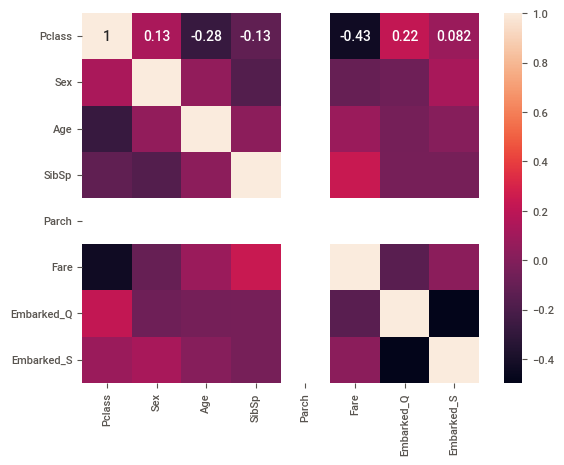

In [ ]:
sns.heatmap(data1.corr(),annot= True)

# Step 6:- Model Creation


In [ ]:
x= final_df.iloc[:,:-1]
y= final_df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_test.shape

(179, 8)

In [ ]:
x_train.shape

(712, 8)

# Step 7:- Model Evaluation (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
clf=LogisticRegression()

clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
# Count of Actual output PREDICTED OUPUT

[[82 23]
 [20 54]]


In [ ]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Survived,,
0,82,23
1,20,54


In [ ]:
Acc = accuracy_score(y_test,y_pred)
Acc

0.7597765363128491

In [ ]:
recall=recall_score(y_test,y_pred)
recall

0.7297297297297297

In [ ]:
precision=precision_score(y_test,y_pred)
precision

0.7012987012987013

In [ ]:
f1score=f1_score(y_test,y_pred)
f1score

0.7152317880794701

In [ ]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.73      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.76      0.76      0.76       179



# SVC

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
final_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({0: 444, 1: 268})

In [ ]:
Counter(y_smote)

Counter({0: 444, 1: 444})

In [ ]:
# Algorithm
from sklearn.svm import SVC

model = SVC()

model.fit(x_smote, y_smote)

SVC()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(model,x,y,cv=10,scoring = 'accuracy')

In [ ]:
cross_val

array([0.82222222, 0.78651685, 0.78651685, 0.85393258, 0.86516854,
       0.79775281, 0.80898876, 0.76404494, 0.83146067, 0.79775281])

In [ ]:
print('Cross validation score',cross_val.std())

Cross validation score 0.030130987213614034


In [ ]:
#std() is less than 0.05, we say the model is working good

In [ ]:
# Traning accuacy
y_pred_train = model.predict(x_train)

In [ ]:
accuracy_score(y_pred_train,y_train)

0.8061797752808989

# Hyperparameter Tuning

In [ ]:

param_grid = {'C':[1,5,10,50,60,70],
              'gamma':[0.1,0.01,0.001,0.02,0.032,0.001],
              'random_state':list(range(1,20))}

In [ ]:
from sklearn.model_selection import GridSearchCV

svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')

grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.02, 0.032, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
model1 = SVC(C=10000,gamma=0.001,random_state=40)
model1.fit(x_smote,y_smote)

SVC(C=10000, gamma=0.001, random_state=40)

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
y_pred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred1)

0.7821229050279329

# Decision Tree

In [ ]:
#import the algoo
from sklearn.tree import DecisionTreeClassifier

#init
model = DecisionTreeClassifier()

#train
model.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_test_pred)

0.7541899441340782

In [ ]:
y_train_pred= model.predict(x_smote)

In [ ]:
accuracy_score(y_smote,y_train_pred)

0.9718468468468469

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[82 23]
 [21 53]]
